## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Loading data

In [ ]:
data = pd.read_csv("dataset_for_volume_classification_model_v2.csv", sep=",")

In [ ]:
data.head()

,width,height,surface,detected_object,object_condition,brand,volume
0,0.405624,0.271085,0.109959,bottle,defective,DIMA,0.5
1,0.395052,0.267947,0.105853,bottle,defective,TIJEN,0.5
2,0.440588,0.209557,0.092328,bottle,non_defective,COCA,0.5
3,0.450576,0.264297,0.119086,bottle,defective,MIRA,0.5
4,0.419848,0.212147,0.089069,bottle,non_defective,TIJEN,0.5


In [ ]:
data.columns.tolist()

['width',
 'height',
 'surface',
 'detected_object',
 'object_condition',
 'brand',
 'volume']

## Encoding data

In [ ]:
encoded_data = pd.get_dummies(data, columns=["detected_object"], drop_first=True)

In [ ]:
encoded_data = pd.get_dummies(encoded_data, columns=["object_condition"], drop_first=True)

In [ ]:
encoded_data = pd.get_dummies(encoded_data, columns=["brand"], drop_first=True)

In [ ]:
encoded_data.head()

,width,height,surface,volume,detected_object_can,object_condition_non_defective,brand_AQUALINE,brand_BARGOU,brand_BEYA,brand_BOGACIDRE,...,brand_MARWA,brand_MELLITI,brand_MIRA,brand_ORANGINA,brand_ROYALE,brand_SABRINE,brand_SAFIA,brand_SPRITE,brand_TIBA,brand_TIJEN
0,0.405624,0.271085,0.109959,0.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.395052,0.267947,0.105853,0.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.440588,0.209557,0.092328,0.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.450576,0.264297,0.119086,0.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.419848,0.212147,0.089069,0.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
target = ['volume']
data[target] = data[target].astype('category')
X = encoded_data.drop(target, axis=1)
y = data[target]

In [ ]:
X

,width,height,surface,detected_object_can,object_condition_non_defective,brand_AQUALINE,brand_BARGOU,brand_BEYA,brand_BOGACIDRE,brand_BOGACITRON,...,brand_MARWA,brand_MELLITI,brand_MIRA,brand_ORANGINA,brand_ROYALE,brand_SABRINE,brand_SAFIA,brand_SPRITE,brand_TIBA,brand_TIJEN
0,0.405624,0.271085,0.109959,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.395052,0.267947,0.105853,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.440588,0.209557,0.092328,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.450576,0.264297,0.119086,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.419848,0.212147,0.089069,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.286300,0.257852,0.073823,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,0.281548,0.218445,0.061503,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
502,0.279923,0.250384,0.070088,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
503,0.282988,0.211404,0.059825,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

,volume
0,0.50
1,0.50
2,0.50
3,0.50
4,0.50
...,...
500,0.24
501,0.24
502,0.24
503,0.24


## Splitting data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=True)

In [ ]:
y_train = pd.get_dummies(y_train).values

In [ ]:
y_test = pd.get_dummies(y_test).values

In [ ]:
y_val = pd.get_dummies(y_val).values

In [ ]:
X_train.shape

(363, 27)

In [ ]:
X_val.shape

(41, 27)

In [ ]:
X_test.shape

(101, 27)

## Modeling

In [ ]:
model = Sequential()
model.add(tf.keras.Input(shape=(len(X.columns),)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(tf.keras.layers.Dense(int(data[target].nunique())
, activation='softmax'))

model.summary()

In [ ]:
model.compile(optimizer='ADAM', loss='categorical_crossentropy', metrics=['accuracy'])

## Training

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > 0.99:
            print('\n Validation accuracy = \
            99% so, stopping further training.')
            self.model.stop_training = True


es = EarlyStopping(patience=3,
                   monitor='val_accuracy',
                   restore_best_weights=True,
                   verbose=1)

lr = ReduceLROnPlateau(monitor='val_loss',
                       patience=3,
                       factor=0.5,
                       verbose=1)

In [ ]:
# hyperparameters
EPOCHS = 150
BATCH_SIZE = 8

In [ ]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val), callbacks = [es, lr, myCallback()])

Epoch 1/150
46/46 [==============================] - 1s 4ms/step - loss: 1.5347 - accuracy: 0.4132 - val_loss: 1.4969 - val_accuracy: 0.4146 - lr: 0.0010
Epoch 2/150
46/46 [==============================] - 0s 2ms/step - loss: 1.3774 - accuracy: 0.4242 - val_loss: 1.3886 - val_accuracy: 0.4146 - lr: 0.0010
Epoch 3/150
46/46 [==============================] - 0s 2ms/step - loss: 1.2309 - accuracy: 0.4435 - val_loss: 1.2585 - val_accuracy: 0.5122 - lr: 0.0010
Epoch 4/150
46/46 [==============================] - 0s 1ms/step - loss: 1.0386 - accuracy: 0.6061 - val_loss: 0.9958 - val_accuracy: 0.6098 - lr: 0.0010
Epoch 5/150
46/46 [==============================] - 0s 2ms/step - loss: 0.7707 - accuracy: 0.6942 - val_loss: 0.7401 - val_accuracy: 0.7805 - lr: 0.0010
Epoch 6/150
46/46 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.8320 - val_loss: 0.5550 - val_accuracy: 0.8049 - lr: 0.0010
Epoch 7/150
46/46 [==============================] - 0s 1ms/step - loss: 0.3

In [ ]:
from matplotlib import pyplot as plt

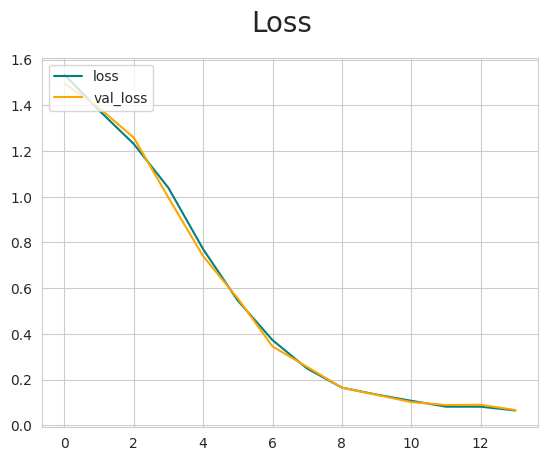

In [ ]:
fig = plt.figure()

plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

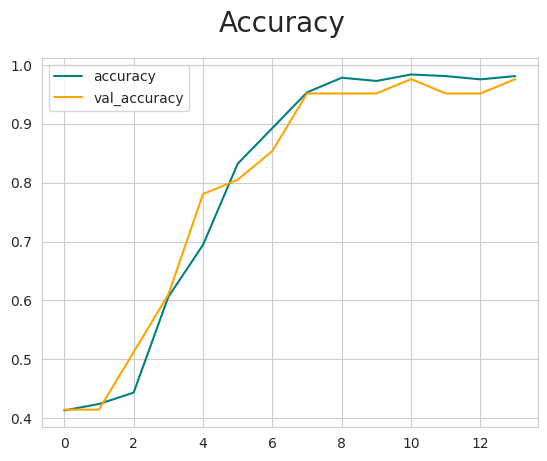

In [ ]:
fig = plt.figure()

plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Testing

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


In [ ]:
y_pred

array([[8.82689903e-08, 9.99348819e-01, 5.68796590e-04, 8.20989662e-05,
        1.75860038e-07],
       [7.37447815e-04, 3.91281843e-02, 8.29870582e-01, 2.34993678e-02,
        1.06764488e-01],
       [9.95672584e-01, 3.74683026e-07, 1.29564327e-07, 3.69943737e-04,
        3.95682501e-03],
       [6.74015973e-05, 9.71516550e-01, 2.19236426e-02, 6.31956058e-03,
        1.72676329e-04],
       [1.20439089e-03, 8.22467636e-03, 9.51707247e-04, 9.88501787e-01,
        1.11748534e-03],
       [5.89300907e-05, 8.86742830e-01, 1.99859105e-02, 9.30621997e-02,
        1.50074382e-04],
       [4.78979573e-03, 6.89885207e-03, 1.43636949e-02, 9.53243554e-01,
        2.07041372e-02],
       [1.13315233e-04, 8.77277315e-01, 1.27959130e-02, 1.09656006e-01,
        1.57383853e-04],
       [2.35026964e-04, 6.36857271e-01, 3.36168557e-01, 2.34584957e-02,
        3.28069157e-03],
       [1.57731251e-04, 9.20234978e-01, 6.87230155e-02, 1.02158999e-02,
        6.68453227e-04],
       [1.11537601e-03, 8.8817

In [ ]:
max_indices = np.argmax(y_pred, axis=1)

In [ ]:
max_indices

array([1, 2, 0, 1, 3, 1, 3, 1, 1, 1, 3, 0, 1, 1, 1, 3, 3, 2, 1, 1, 1, 3,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 0, 1, 2, 1, 3, 1, 2, 3, 3, 3, 1,
       0, 4, 3, 1, 3, 0, 1, 3, 1, 3, 1, 0, 3, 0, 1, 1, 0, 3, 0, 1, 0, 1,
       1, 3, 0, 1, 1, 3, 1, 0, 3, 3, 1, 4, 1, 3, 3, 4, 4, 3, 2, 0, 4, 1,
       1, 1, 1, 0, 1, 1, 4, 4, 2, 3, 4, 0, 3])

In [ ]:
y_pred = np.eye(y_pred.shape[1])[max_indices]

In [ ]:
y_pred = y_pred.astype(int)

In [ ]:
y_pred

array([[0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0,

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00         8

   micro avg       0.99      0.99      0.99       101
   macro avg       1.00      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101
 samples avg       0.99      0.99      0.99       101



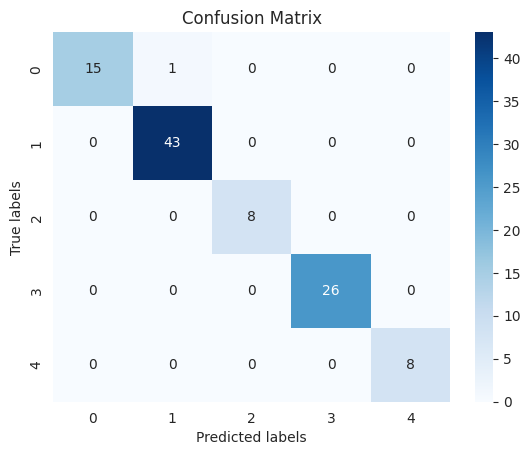

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Saving the model

In [ ]:
model.save('volume_classification_model_v2')

INFO:tensorflow:Assets written to: volume_classification_model_v2/assets


INFO:tensorflow:Assets written to: volume_classification_model_v2/assets


## Convert our model to TFLite
#### TFLite is a lighter version of our model which can be deployed in an embedded system such as a raspberry pi

In [ ]:
model = tf.keras.models.load_model('volume_classification_model_v2')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [ ]:
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpnnu813wn/assets


INFO:tensorflow:Assets written to: /tmp/tmpnnu813wn/assets
2023-04-30 22:36:38.689632: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-04-30 22:36:38.689659: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-04-30 22:36:38.689783: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpnnu813wn
2023-04-30 22:36:38.690309: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-04-30 22:36:38.690323: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpnnu813wn
2023-04-30 22:36:38.692103: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-04-30 22:36:38.706099: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmpnnu813wn
2023-04-30 22:36:38.710174: I tensorflow/cc/saved_model/loader.cc:305] SavedModel

In [ ]:
open("volume_classification_model_v2_tflite.tflite", "wb").write(tflite_model)

3160

## Compressing and exporting our model

In [ ]:
!zip -r volume_classification_model_v2.zip volume_classification_model_v2

  adding: volume_classification_model_v2/ (stored 0%)
  adding: volume_classification_model_v2/variables/ (stored 0%)
  adding: volume_classification_model_v2/variables/variables.data-00000-of-00001 (deflated 50%)
  adding: volume_classification_model_v2/variables/variables.index (deflated 50%)
  adding: volume_classification_model_v2/saved_model.pb (deflated 87%)
  adding: volume_classification_model_v2/keras_metadata.pb (deflated 83%)
  adding: volume_classification_model_v2/fingerprint.pb (stored 0%)
  adding: volume_classification_model_v2/assets/ (stored 0%)


In [ ]:
!zip -r volume_classification_model_v2_tflite.zip volume_classification_model_v2_tflite.tflite

  adding: volume_classification_model_v2_tflite.tflite (deflated 30%)
